In [24]:
import pandas as pd
import numpy as np

In [25]:
data_cancer = pd.read_csv('cancer_data.csv')
data_cancer.head(5)

,year,type,sex,numbers,icd_codes,cancer_category
0,2016,regs,AllSex,24218,"C00-C96, D45-D47",All cancers
1,2015,regs,AllSex,23380,"C00-C96, D45-D47",All cancers
2,2014,regs,AllSex,23227,"C00-C96, D45-D47",All cancers
3,2013,regs,AllSex,22395,"C00-C96, D45-D47",All cancers
4,2012,regs,AllSex,22062,"C00-C96, D45-D47",All cancers


In [26]:
data_cancer.tail(5)

,year,type,sex,numbers,icd_codes,cancer_category
2809,2001,deaths,Male,2,C50,Breast
2810,2002,deaths,Male,1,C50,Breast
2811,2011,deaths,AllSex,1,C62,Testis
2812,2011,deaths,Male,1,C62,Testis
2813,2012,deaths,Male,1,C50,Breast


In [27]:
data_cancer.sample(5)

,year,type,sex,numbers,icd_codes,cancer_category
2142,2010,deaths,Female,96,C71,Brain
2433,1996,deaths,Male,54,C90,Myeloma
67,2001,regs,Female,8384,"C00-C96, D45-D47",All cancers
723,2006,regs,AllSex,430,"C64-C66, C68",Kidney and other urinary
1055,2012,regs,AllSex,277,C73,Thyroid


In [28]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             2814 non-null   int64 
 1   type             2814 non-null   object
 2   sex              2814 non-null   object
 3   numbers          2814 non-null   int64 
 4   icd_codes        2814 non-null   object
 5   cancer_category  2772 non-null   object
dtypes: int64(2), object(4)
memory usage: 132.0+ KB


In [29]:
data_cancer.isnull().sum()

year                0
type                0
sex                 0
numbers             0
icd_codes           0
cancer_category    42
dtype: int64

In [30]:
for column in data_cancer.columns:
    print(f'======= {column} =======')
    display(data_cancer[column].value_counts())
    print()

======= year =======


2016    135
2008    135
2005    135
2003    135
2004    135
2015    135
2007    135
2006    135
2009    135
2011    135
2010    135
2012    135
2013    135
2014    135
2001    132
2002    132
2000    132
1999    132
1998    132
1996    132
1997    132
Name: year, dtype: int64


======= type =======


regs      1428
deaths    1386
Name: type, dtype: int64


======= sex =======


AllSex    1022
Female     938
Male       854
Name: sex, dtype: int64


======= numbers =======


10       20
7        20
5        18
146      17
148      16
         ..
602       1
598       1
596       1
1634      1
24218     1
Name: numbers, Length: 967, dtype: int64


======= icd_codes =======


C00-C96, D45-D47    126
C67                 126
C81                 126
C15                 126
C71                 126
C73                 126
C22                 126
C90                 126
C16                 126
C00-C14             126
C25                 126
C64-C66, C68        126
C91-C95             126
C82-C86, C96        126
C33-C34             126
C43                 126
C18-C21             126
C50                 126
C54-C55              84
C61                  84
C56-C57              84
C53                  84
C62                  84
C51                  84
D45-D47              42
Name: icd_codes, dtype: int64


======= cancer_category =======


All cancers                          126
Bladder                              126
Hodgkin lymphoma                     126
Oesophagus                           126
Brain                                126
Thyroid                              126
Liver and intrahepatic bile ducts    126
Myeloma                              126
Stomach                              126
Lip, Oral Cavity and Pharynx         126
Pancreas                             126
Kidney and other urinary             126
Leukaemia                            126
Non-Hodgkin lymphoma                 126
Lung & Trachea                       126
Melanoma                             126
Colorectum and anus                  126
Breast                               126
Uterus                                84
Prostate                              84
Ovary                                 84
Cervix                                84
Testis                                84
Vulva                                 84
Name: cancer_cat

In [31]:
data_cancer['cancer_category'] = data_cancer['cancer_category'].fillna(data_cancer['cancer_category'].mode()[0])

In [32]:
data_cancer.isnull().sum()

year               0
type               0
sex                0
numbers            0
icd_codes          0
cancer_category    0
dtype: int64

In [33]:
len(data_cancer.drop_duplicates()) / len(data_cancer)

1.0

In [34]:
data_cancer = data_cancer.drop_duplicates()

<AxesSubplot:>

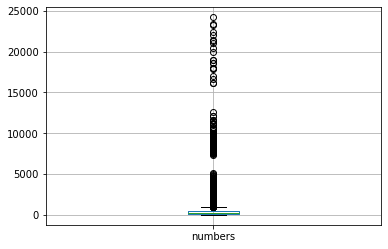

In [35]:
data_cancer[['numbers']].boxplot()

In [36]:
numbers_min = np.min(data_cancer['numbers'])
numbers_max = np.max(data_cancer['numbers'])
print('Nilai min_numbers = ', numbers_min)
print('Nilai max_numbers = ', numbers_max)

Nilai min_numbers =  1
Nilai max_numbers =  24218


In [37]:
Q1 = np.quantile(data_cancer['numbers'], .25)
Q3 = np.quantile(data_cancer['numbers'], .75)
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  100.0
Kuartil 3 =  453.5
IQR =  353.5


In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    return Q1,Q3

In [39]:
Low_number, Upper_number = remove_outlier(data_cancer['numbers'])

In [40]:
data_cancer['numbers'] = np.where(data_cancer['numbers']>Upper_number,Upper_number,data_cancer['numbers'])
data_cancer['numbers'] = np.where(data_cancer['numbers']<Low_number,Low_number,data_cancer['numbers'])

<AxesSubplot:>

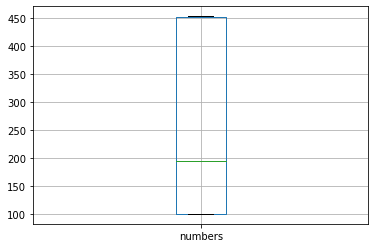

In [41]:
data_cancer[['numbers']].boxplot()

In [20]:
Q1 = np.quantile(data_cancer['numbers'], 0.25)
Q3 = np.quantile(data_cancer['numbers'], 0.75)
IQR_ = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  100.0
Kuartil 3 =  452.375
IQR =  353.5


In [21]:
for column in data_cancer.columns:
    print(f'======= {column} =======')
    display(data_cancer[column].value_counts())
    print()

======= year =======


2016    135
2008    135
2005    135
2003    135
2004    135
2015    135
2007    135
2006    135
2009    135
2011    135
2010    135
2012    135
2013    135
2014    135
2001    132
2002    132
2000    132
1999    132
1998    132
1996    132
1997    132
Name: year, dtype: int64


======= type =======


regs      1428
deaths    1386
Name: type, dtype: int64


======= sex =======


AllSex    1022
Female     938
Male       854
Name: sex, dtype: int64


======= numbers =======


100.0    713
453.5    704
146.0     17
148.0     16
142.0     16
        ... 
354.0      1
358.0      1
361.0      1
365.0      1
258.0      1
Name: numbers, Length: 315, dtype: int64


======= icd_codes =======


C00-C96, D45-D47    126
C67                 126
C81                 126
C15                 126
C71                 126
C73                 126
C22                 126
C90                 126
C16                 126
C00-C14             126
C25                 126
C64-C66, C68        126
C91-C95             126
C82-C86, C96        126
C33-C34             126
C43                 126
C18-C21             126
C50                 126
C54-C55              84
C61                  84
C56-C57              84
C53                  84
C62                  84
C51                  84
D45-D47              42
Name: icd_codes, dtype: int64


======= cancer_category =======


All cancers                          168
Bladder                              126
Hodgkin lymphoma                     126
Oesophagus                           126
Brain                                126
Thyroid                              126
Liver and intrahepatic bile ducts    126
Myeloma                              126
Stomach                              126
Lip, Oral Cavity and Pharynx         126
Pancreas                             126
Kidney and other urinary             126
Leukaemia                            126
Non-Hodgkin lymphoma                 126
Lung & Trachea                       126
Melanoma                             126
Colorectum and anus                  126
Breast                               126
Uterus                                84
Prostate                              84
Ovary                                 84
Cervix                                84
Testis                                84
Vulva                                 84
Name: cancer_cat

In [22]:
### Onehot Encoding
onehot_columns = ['type', 'sex']
data_cancer = pd.get_dummies(data_cancer, columns = onehot_columns)

In [23]:
#data_cancer.to_excel('Cleaned_data_cancer.xlsx', index=False)
#data_cancer.to_csv('Cleaned_data_cancer.csv', index=False)
data_cancer

,year,numbers,icd_codes,cancer_category,type_deaths,type_regs,sex_AllSex,sex_Female,sex_Male
0,2016,453.5,"C00-C96, D45-D47",All cancers,0,1,1,0,0
1,2015,453.5,"C00-C96, D45-D47",All cancers,0,1,1,0,0
2,2014,453.5,"C00-C96, D45-D47",All cancers,0,1,1,0,0
3,2013,453.5,"C00-C96, D45-D47",All cancers,0,1,1,0,0
4,2012,453.5,"C00-C96, D45-D47",All cancers,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
2809,2001,100.0,C50,Breast,1,0,0,0,1
2810,2002,100.0,C50,Breast,1,0,0,0,1
2811,2011,100.0,C62,Testis,1,0,1,0,0
2812,2011,100.0,C62,Testis,1,0,0,0,1
